The RMS Titanic was known as the unsinkable ship and was the largest, most luxurious
passenger ship of its time. Sadly, the British ocean liner sank on April 15, 1912,
killing over 1500 people while just 705 survived.

Exploratory Data Analysis (EDA) of the titanic dataset
See https://www.encyclopedia-titanica.org/

Random Forest Classifier: https://www.kaggle.com/shubham47/random-forest-classifier-tutorial

In [1]:
# Imports

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load cleaned and feature engineered dataset
titanic = pd.read_csv('datasets/featured_titanic.csv')

In [3]:
# Split the data into independent ‘x’ and dependent ‘y’ data sets.
x1 = titanic.drop(columns=['survived'])
y = titanic['survived']

In [4]:
# Normalize
scaler = MinMaxScaler()
x = scaler.fit_transform(x1)

In [5]:
# Split the data again, now into 75% training (x_train and y_train) and 25% testing (x_test
# and y_test) data sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5, shuffle=True)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1047, 9) (262, 9)
(1047,) (262,)


In [6]:
# Classification
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

# Train the model
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

Accuracy: 0.7824427480916031
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       162
           1       0.72      0.70      0.71       100

    accuracy                           0.78       262
   macro avg       0.77      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262



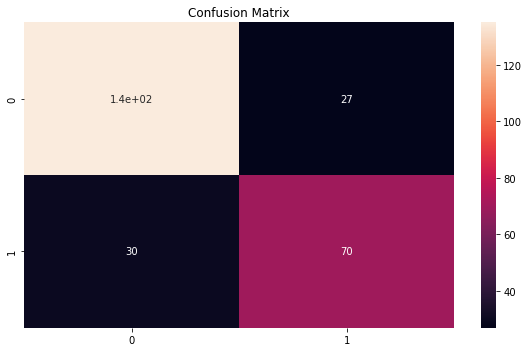

In [7]:
y_pred = forest.predict(x_test)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [8]:
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=x1.columns).sort_values(ascending=False)
forest_importances

fare          0.268571
age           0.257041
gender_1.0    0.226358
familysize    0.085472
deck          0.063597
pclass        0.061299
embarked_2    0.022498
gender_2.0    0.008073
embarked_1    0.007090
dtype: float64

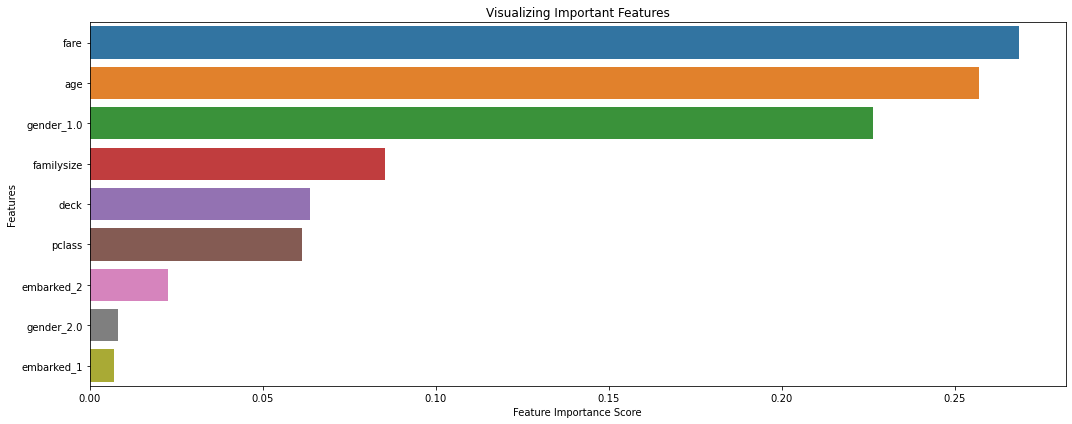

In [9]:
plt.figure(figsize=(15,6))
sns.barplot(x=forest_importances, y=forest_importances.index)

# Add labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [10]:
# Removing less important features from x
new_x = x1.drop(columns=['embarked_1', 'gender_2.0', 'embarked_2'])

# Normalize
scaler = MinMaxScaler()
x = scaler.fit_transform(new_x)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.25, random_state=5, shuffle=True)

# Classification
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

# Train the model
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

Accuracy: 0.7896341463414634
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       205
           1       0.73      0.70      0.71       123

    accuracy                           0.79       328
   macro avg       0.78      0.77      0.77       328
weighted avg       0.79      0.79      0.79       328



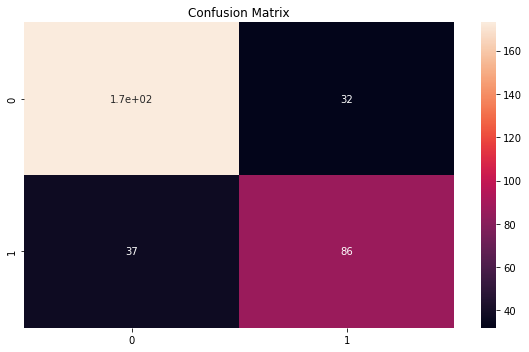

In [12]:
y_pred = forest.predict(x_test)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

A slight improvement. Just a bit. More feature engineering?